In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('/content/sample_data/U.S. Presidents Birth and Death Information - Sheet1.csv')

# Convert birth_date and death_date columns to datetime objects
data['BIRTH DATE'] = pd.to_datetime(data['BIRTH DATE'])
data['DEATH DATE'] = pd.to_datetime(data['DEATH DATE'])

# Calculate year of birth
data['year_of_birth'] = data['BIRTH DATE'].dt.year

# Calculate lived_years, lived_months, lived_days for each president
data['lived_years'] = (data['DEATH DATE'] - data['BIRTH DATE']).dt.days / 365.00
data['lived_months'] = (data['DEATH DATE'] - data['BIRTH DATE']).dt.days / 30.00
data['lived_days'] = (data['DEATH DATE'] - data['BIRTH DATE']).dt.days


In [3]:
# Sort the data by lived_days in descending order and select top 10 longest lived presidents
top_10_longest_lived = data.nlargest(10, 'lived_days')[['PRESIDENT', 'lived_years', 'lived_months', 'lived_days']]

# Sort the data by lived_days in ascending order and select top 10 shortest lived presidents
top_10_shortest_lived = data.nsmallest(10, 'lived_days')[['PRESIDENT', 'lived_years', 'lived_months', 'lived_days']]


In [11]:
from tabulate import tabulate

print("Top 10 Longest Lived Presidents:")
print(tabulate(top_10_longest_lived, headers='keys', tablefmt='grid', showindex=False))


Top 10 Longest Lived Presidents:
+-------------------+---------------+----------------+--------------+
| PRESIDENT         |   lived_years |   lived_months |   lived_days |
+===================+===============+================+==============+
| George Bush       |       94.5315 |       1150.13  |        34504 |
+-------------------+---------------+----------------+--------------+
| Gerald Ford       |       93.5151 |       1137.77  |        34133 |
+-------------------+---------------+----------------+--------------+
| Ronald Reagan     |       93.3918 |       1136.27  |        34088 |
+-------------------+---------------+----------------+--------------+
| John Adams        |       90.737  |       1103.97  |        33119 |
+-------------------+---------------+----------------+--------------+
| Herbert Hoover    |       90.2548 |       1098.1   |        32943 |
+-------------------+---------------+----------------+--------------+
| Harry S. Truman   |       88.6932 |       1079.1   |   

In [15]:
summary_longest_lived = top_10_longest_lived.describe()
print(summary_longest_lived)

       lived_years  lived_months    lived_days
count    10.000000     10.000000     10.000000
mean     88.175616   1072.803333  32184.100000
std       5.188744     63.129720   1893.891611
min      80.673973    981.533333  29446.000000
25%      83.795205   1019.508333  30585.250000
50%      89.473973   1088.600000  32658.000000
75%      92.728082   1128.191667  33845.750000
max      94.531507   1150.133333  34504.000000


In [12]:
print("\nTop 10 Shortest Lived Presidents:")
print(tabulate(top_10_shortest_lived, headers='keys', tablefmt='grid', showindex=False))


Top 10 Shortest Lived Presidents:
+--------------------+---------------+----------------+--------------+
| PRESIDENT          |   lived_years |   lived_months |   lived_days |
+====================+===============+================+==============+
| John F. Kennedy    |       46.5151 |        565.933 |        16978 |
+--------------------+---------------+----------------+--------------+
| James A. Garfield  |       49.8685 |        606.733 |        18202 |
+--------------------+---------------+----------------+--------------+
| James K. Polk      |       53.6521 |        652.767 |        19583 |
+--------------------+---------------+----------------+--------------+
| Abraham Lincoln    |       56.2082 |        683.867 |        20516 |
+--------------------+---------------+----------------+--------------+
| Chester Arthur     |       57.1589 |        695.433 |        20863 |
+--------------------+---------------+----------------+--------------+
| Warren G. Harding  |       57.7836 |    

In [16]:
summary_shortest_lived = top_10_shortest_lived.describe()
print(summary_shortest_lived)

       lived_years  lived_months    lived_days
count    10.000000     10.000000     10.000000
mean     56.386575    686.036667  20581.100000
std       5.101272     62.065482   1861.964461
min      46.515068    565.933333  16978.000000
25%      54.291096    660.541667  19816.250000
50%      57.471233    699.233333  20977.000000
75%      59.840411    728.058333  21841.750000
max      63.238356    769.400000  23082.000000


In [6]:
# Calculate summary statistics for lived_days
mean_lived_days = data['lived_days'].mean()
median_lived_days = data['lived_days'].median()
mode_lived_days = data['lived_days'].mode().iloc[0]
max_lived_days = data['lived_days'].max()
min_lived_days = data['lived_days'].min()
std_lived_days = data['lived_days'].std()


In [13]:
summary_data = {
    "Summary Measure": ["Mean", "Median", "Mode", "Max", "Min", "Standard Deviation"],
    "Lived Days": [mean_lived_days, median_lived_days, mode_lived_days, max_lived_days, min_lived_days, std_lived_days]
}
summary_df = pd.DataFrame(summary_data)

print("Summary Statistics for Lived Days:")
print(tabulate(summary_df, headers='keys', tablefmt='grid', showindex=False))


Summary Statistics for Lived Days:
+--------------------+--------------+
| Summary Measure    |   Lived Days |
+====================+==============+
| Mean               |     26097.2  |
+--------------------+--------------+
| Median             |     25673    |
+--------------------+--------------+
| Mode               |     16978    |
+--------------------+--------------+
| Max                |     34504    |
+--------------------+--------------+
| Min                |     16978    |
+--------------------+--------------+
| Standard Deviation |      4596.07 |
+--------------------+--------------+


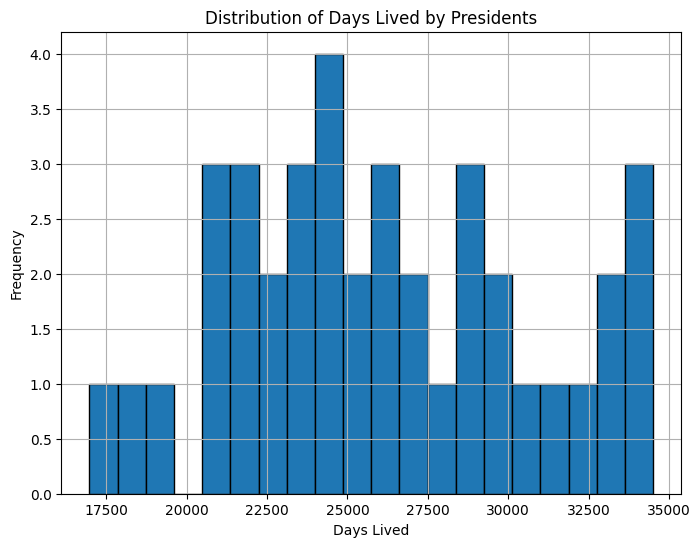

In [8]:
plt.figure(figsize=(8,6))
plt.hist(data['lived_days'], bins=20, edgecolor='black')
plt.xlabel('Days Lived')
plt.ylabel('Frequency')
plt.title('Distribution of Days Lived by Presidents')
plt.grid(True)
plt.show()
